<a href="https://colab.research.google.com/github/Avichay3/Full-training/blob/main/Copy_of_data_normalization_research_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalization research

```Read the following ideas about data normalization. Use the data given to you to demonstrate these ideas on a real dataset.```

```Why use normalization?```
- ```Normalization before using any dimensionality reduction algorithm (for example, PCA), is extremely important.```
- ```You might want to use different normalizers when using different kinds of clustering methods. For example, when expecting to find 'long' (elliptic) clusters while using Kmeans, you should normalize the data so the clusters will be more "round". What can you do when clusters have different "orientation" in the vector space?```
- ```Normalize the data before training. You can hope to achieve two purposes:```
    - ```Get rid of anomalies, usually by clipping of some sort.```
    - ```Scale the data to fit into algorithms such as linear regression or neural network.```
    
```Normalizing methods I would recommend to examine:```
- ```sklearn.preprocessing.StandardScaler```
- ```sklearn.preprocessing.MinMaxScaler```
- ```np.clip```
- ```np.log10```
- ```df.rank()/float(len(df)) (percentiles normalization, or transforming into a uniform distribution)```

```Try thinking about normalization as methods to change the distribution of your data. What kinds of distributions would you rather work with? Can you think of disadvantages of changing the distribution (think about data which is clustered)?```

```Think about the natural way to compute distance between two "points in a distribution". How can you use normalization to compute the distance fast?```

~```Ittai Haran```

In [36]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df = pd.read_csv('/content/drive/MyDrive/training_files/data2.csv')

In [38]:
df = pd.read_csv('data2.csv')
df.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5
0,149.52,1.1213,0.2708,0.3004,3201.679870
1,150.28,1.1243,0.2751,0.3023,46.693300
2,151.10,1.1274,0.2798,0.3044,4779.644705
3,147.30,1.1126,0.2581,0.2948,4778.732505
4,129.84,0.9919,0.2368,0.2673,4774.421205
5,151.10,1.1274,0.2798,0.3044,4779.644705
6,151.10,1.1274,0.2798,0.3044,46.889000
7,151.10,1.1274,0.2798,0.3044,1624.474235
8,151.10,1.1274,0.2798,0.3044,1624.474235
9,71.72,0.5704,0.1941,0.1815,3182.431370


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681349 entries, 0 to 681348
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   feature_1  681349 non-null  float64
 1   feature_2  681349 non-null  float64
 2   feature_3  681349 non-null  float64
 3   feature_4  681349 non-null  float64
 4   feature_5  681349 non-null  float64
dtypes: float64(5)
memory usage: 26.0 MB


In [40]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5
count,681349.000000,681349.000000,681349.000000,681349.000000,681349.000000
mean,1666.673835,13.811707,15.548901,17.371848,2759.302734
std,3761.472675,29.786061,37.056527,40.422788,1898.812091
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.550000,1.490400,0.930600,1.105400,1592.726335
50%,565.740000,4.843100,4.148100,4.892400,3173.119670
75%,1690.530000,13.871200,15.123300,17.281200,4751.604405
max,223287.840000,2270.682200,1283.078300,1502.867800,34916.968405


array([[<Axes: title={'center': 'feature_1'}>,
        <Axes: title={'center': 'feature_2'}>],
       [<Axes: title={'center': 'feature_3'}>,
        <Axes: title={'center': 'feature_4'}>],
       [<Axes: title={'center': 'feature_5'}>, <Axes: >]], dtype=object)

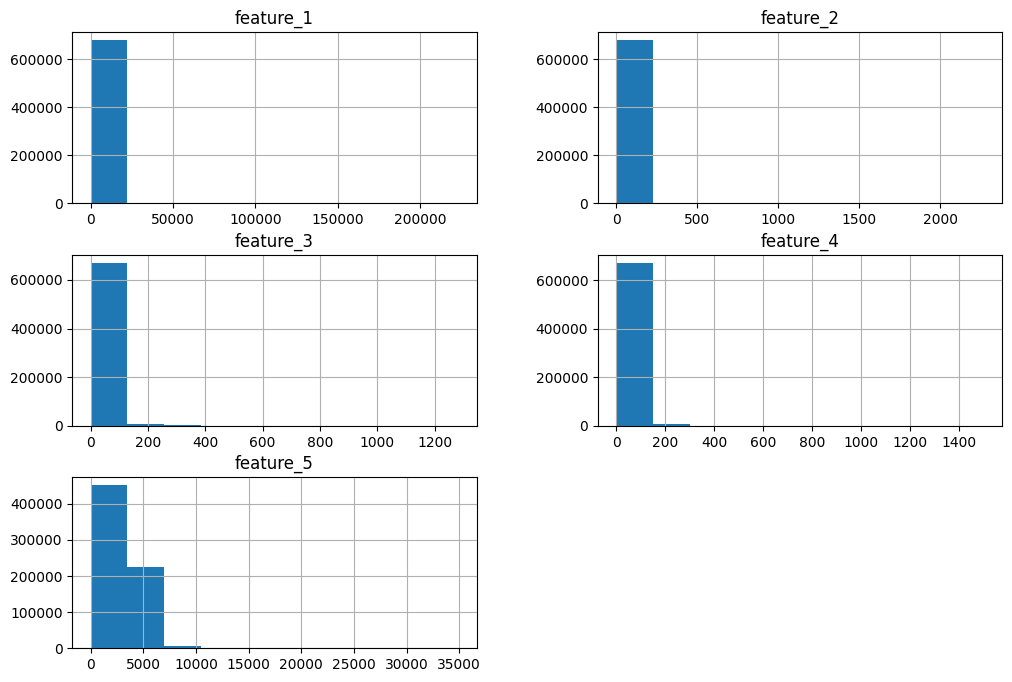

In [41]:
df.hist(figsize=(12,8))

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns
)

In [43]:
df_std.mean()
df_std.std()

,0
feature_1,1.000001
feature_2,1.000001
feature_3,1.000001
feature_4,1.000001
feature_5,1.000001


# now let's use MinMaxScalar

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns
)

In [45]:
df_log = df.copy()
df_log['feature_5'] = np.log10(df_log['feature_5'] + 1)

In [46]:
df_clip = df.copy()
df_clip['feature_5'] = np.clip(df_clip['feature_5'], 0, 4000)

In [47]:
df_rank = df.rank() / float(len(df))

In [48]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df)
pca.explained_variance_ratio_

array([8.25000650e-01, 1.74969921e-01, 1.94407734e-05, 8.48169471e-06,
       1.50633911e-06])

In [49]:
for name, data in {
    "original": df,
    "standard": df_std,
    "minmax": df_minmax,
    "log": df_log,
    "rank": df_rank
}.items():
    print(f"\n{name}")
    print(data.describe())
    print("Skew:\n", data.skew())


original
           feature_1      feature_2      feature_3      feature_4  \
count  681349.000000  681349.000000  681349.000000  681349.000000   
mean     1666.673835      13.811707      15.548901      17.371848   
std      3761.472675      29.786061      37.056527      40.422788   
min         0.000000       0.000000       0.000000       0.000000   
25%       156.550000       1.490400       0.930600       1.105400   
50%       565.740000       4.843100       4.148100       4.892400   
75%      1690.530000      13.871200      15.123300      17.281200   
max    223287.840000    2270.682200    1283.078300    1502.867800   

           feature_5  
count  681349.000000  
mean     2759.302734  
std      1898.812091  
min         0.000000  
25%      1592.726335  
50%      3173.119670  
75%      4751.604405  
max     34916.968405  
Skew:
 feature_1    9.190832
feature_2    8.555843
feature_3    8.324100
feature_4    8.269243
feature_5    0.348317
dtype: float64

standard
          feature_1

In [50]:
from sklearn.decomposition import PCA

def run_pca(name, data):
    pca = PCA()
    pca.fit(data)
    print(f"\n{name}")
    print("Explained variance ratio:")
    print(pca.explained_variance_ratio_[:5])

for name, data in {
    "original": df,
    "standard": df_std,
    "minmax": df_minmax,
    "log": df_log,
    "rank": df_rank
}.items():
    run_pca(name, data)


original
Explained variance ratio:
[8.25000650e-01 1.74969921e-01 1.94407734e-05 8.48169471e-06
 1.50633911e-06]

standard
Explained variance ratio:
[0.77185151 0.17235422 0.04233636 0.00986807 0.00358984]

minmax
Explained variance ratio:
[0.67651121 0.3065917  0.01137127 0.00296851 0.00255731]

log
Explained variance ratio:
[9.99963032e-01 2.43937996e-05 1.06544053e-05 1.89009638e-06
 2.94467169e-08]

rank
Explained variance ratio:
[0.7597031  0.18325294 0.03841284 0.01176378 0.00686734]


Key Findings:

without normalization, PCA is dominated by the features with extreme skewness and large variance, leading to dimensional collapse.

StandardScaler distributes variance more evenly, allowing PCA to capture meaningful multi-dimensional structure.

MinMaxScaler does not fully resolve variance imbalance when heavy skew exists.

Log transformation applied to a single feature may worsen variance imbalance if other features remain highly skewed.

Rank normalization drastically changes the distribution but produces a balanced variance structure similar to standardization.

In [52]:
N = 30000
df_sample = df.sample(N, random_state=42)

df_std_sample = df_std.loc[df_sample.index]
df_minmax_sample = df_minmax.loc[df_sample.index]
df_log_sample = df_log.loc[df_sample.index]
df_rank_sample = df_rank.loc[df_sample.index]

In [53]:
from sklearn.cluster import KMeans

for name, data in {
    "original": df_sample,
    "standard": df_std_sample,
    "minmax": df_minmax_sample,
    "log": df_log_sample,
    "rank": df_rank_sample
}.items():
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans.fit(data)
    print(name, "inertia:", kmeans.inertia_)

original inertia: 197504395324.29034
standard inertia: 61137.16341037652
minmax inertia: 48.83414931200618
log inertia: 98605767065.20627
rank inertia: 4106.808712258341


In [54]:
from sklearn.metrics import silhouette_score

for name, data in {
    "original": df_sample,
    "standard": df_std_sample,
    "minmax": df_minmax_sample,
    "log": df_log_sample,
    "rank": df_rank_sample
}.items():
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels, sample_size=5000, random_state=42)
    print(name, "silhouette:", score)

original silhouette: 0.6713617172988763
standard silhouette: 0.6133218151770897
minmax silhouette: 0.5731431912455353
log silhouette: 0.8225396314312362
rank silhouette: 0.3375359245567257


** The results demonstrate that normalization is not merely a technical preprocessing step, but a geometric transformation of the data space.
StandardScaler equalizes variance but does not correct heavy skewness.
Log transformation significantly improved clustering performance by reducing heavy-tailed distortions in Euclidean geometry.
Rank normalization, while balancing marginal distributions, destroyed the metric structure and severely harmed clustering quality. **

** In this notebook, I examined how different normalization techniques affect the structure of the data and the performance of machine learning algorithms. Rather than treating normalization as a simple preprocessing step, I analyzed it as a transformation of the geometry of the data space.

First, I inspected the original dataset and found that most features had extremely high positive skewness. This means that most values were small, but a few values were very large, creating heavy right tails. Such distributions distort Euclidean distances and can negatively affect algorithms like PCA and KMeans, which rely on variance and distance calculations.

I then applied several normalization methods: StandardScaler, MinMaxScaler, log transformation, clipping, and rank normalization. StandardScaler and MinMaxScaler are linear transformations, meaning they change the scale but do not change the shape of the distribution. As expected, they did not reduce skewness. Log transformation, on the other hand, compressed large values and reduced the effect of heavy tails. Rank normalization completely reshaped each feature into a uniform distribution, preserving only order but not true distances.

When applying PCA, I observed that in the original data, the first principal component explained most of the variance, indicating that the data was strongly stretched along one direction. After standardization, variance was distributed more evenly across components. Log transformation significantly changed the structure, and rank normalization also produced a more balanced variance distribution.

For clustering, I evaluated performance using the silhouette score. Interestingly, the log transformation produced the best clustering result. This suggests that the main issue in the dataset was not scale differences, but heavy-tailed distributions. By compressing extreme values, log transformation improved the geometric structure and made clusters more compact. Standard scaling slightly reduced clustering quality, implying that absolute scale carried meaningful information. Rank normalization significantly harmed clustering because it destroyed meaningful distance relationships.

Overall, this study shows that normalization is not just about scaling numbers. It fundamentally changes the geometry of the data space and therefore affects dimensionality reduction and clustering results. The appropriate normalization method depends on the distribution of the data and the assumptions of the algorithm. In this dataset, addressing skewness through log transformation was more important than simply rescaling the features. **